<a href="https://colab.research.google.com/gist/tyty9798123/f302c49c7154e98c52067822e08ede89/experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams["figure.dpi"] = 300

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import ta

from xgboost import XGBClassifier
import pandas as pd

from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import RobustScaler
import traceback

from sklearn.naive_bayes import GaussianNB

In [2]:
pd.reset_option("display.max_rows")

# Data Preprocessing

## Load Data

In [3]:
dataset = pd.read_csv('/Users/emmamorrow25/Penn State SENIOR YEAR (SU2025-SPR2026)/DS 340W/research_project/stock_price_movement_prediction_new/processed_2020_with_1200_14.csv')

In [4]:
dataset.head()

,Unnamed: 0,Date,day_of_the_week,positive_percent_pre_market,positive_percent_55_135,positive_percent_55_95,positive_percent_95_135,positive_percent_after_market,positive_percent_yesterday_market,positive_percent_the_day_before_yesterday,Prev Open,Prev Close,Prev High,Prev Low,Prev HLPCT,Prev Volume,Prev Change Percent,Prev Trade Value,Prev VWAP,percentage_change
0,0,2022-03-07,1,-0.115521,-0.130575,-0.134206,-0.129156,-0.126248,-0.101695,-0.123814,431.75,432.17,433.37,427.88,0.012831,113973677,0.000973,49115793000,430.4263,-0.017101
1,1,2022-03-04,5,-0.174812,-0.137373,-0.148973,-0.134105,-0.140736,-0.112743,-0.091533,440.47,435.71,441.11,433.80,0.016851,104071597,-0.010807,45503370900,436.7508,-0.005745
2,2,2022-03-03,4,-0.093572,-0.104905,-0.136905,-0.088174,-0.107054,-0.084201,-0.108293,432.37,437.89,439.72,431.57,0.018885,117541703,0.012767,51464518900,436.4746,-0.009310
3,3,2022-03-02,3,-0.089150,-0.090783,-0.122835,-0.081741,-0.110207,-0.122380,-0.094917,435.04,429.98,437.17,427.11,0.023554,137521230,-0.011631,59419576700,430.9464,0.010916
4,4,2022-03-01,2,-0.111683,-0.100906,-0.102787,-0.099907,-0.073895,-0.094333,-0.135854,432.03,436.63,438.20,430.70,0.017414,145302843,0.010647,63089900500,434.0840,-0.012091



## Generate the data before training.

In [5]:
# Delete unnecessary columns.
dataset = dataset.drop(
    [
     #'sentiment_number_24hr',
     #'positive_percent_yesterday_market',
     #'Prev Open',
     #'Prev Close',
     #'Prev High',
     #'positive_percent_the_day_before_yesterday', #c
     #'Prev Low',
     #'Prev Volume',
     #'Prev Trade Value',
     'Prev VWAP',#c
     #'positive_percent_pre_market',
     'positive_percent_55_95',
     'positive_percent_55_135',
     'positive_percent_the_day_before_yesterday',
     'positive_percent_95_135',
     #'positive_percent_after_market',
     #'positive_percent_yesterday_market',
     'Prev HLPCT',#c
     #'Premarket Changed'
     #'positive_percent_55_135'#c,
     #"positive_percent_pre_market",
     #"positive_percent_after_market",
     #"positive_percent_yesterday_market"
    ],
    axis=1
)

dataset = dataset.drop(
    [
     'Unnamed: 0',
     #'day_of_the_week',
    ],
    axis=1
)

# Save original columns names from input dataset.
original_columns = dataset.columns.tolist()

In [6]:
# Check original column names.
print(original_columns)

['Date', 'day_of_the_week', 'positive_percent_pre_market', 'positive_percent_after_market', 'positive_percent_yesterday_market', 'Prev Open', 'Prev Close', 'Prev High', 'Prev Low', 'Prev Volume', 'Prev Change Percent', 'Prev Trade Value', 'percentage_change']


In [7]:
# Calculate all technical indicators using the 'ta' library.
dataset = ta.add_all_ta_features(
    dataset.copy(),
    open="Prev Open",
    high="Prev High",
    low="Prev Low",
    close="Prev Close",
    volume="Prev Volume",
    fillna=False
)

In [8]:
# Convert percentage change to percentage.
dataset["percentage_change"] = dataset["percentage_change"] * 100

# Drop day_of_the_week column (unnecessary)
dataset = dataset.drop(['day_of_the_week'], axis=1)

In [9]:
dataset

,Date,positive_percent_pre_market,positive_percent_after_market,positive_percent_yesterday_market,Prev Open,Prev Close,Prev High,Prev Low,Prev Volume,Prev Change Percent,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2022-03-07,-0.115521,-0.126248,-0.101695,431.7500,432.1700,433.3700,427.8800,113973677,0.000973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,2022-03-04,-0.174812,-0.140736,-0.112743,440.4700,435.7100,441.1100,433.8000,104071597,-0.010807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819122,0.815786,0.819122
2,2022-03-03,-0.093572,-0.107054,-0.084201,432.3700,437.8900,439.7200,431.5700,117541703,0.012767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500333,0.499085,1.323553
3,2022-03-02,-0.089150,-0.110207,-0.122380,435.0400,429.9800,437.1700,427.1100,137521230,-0.011631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.806390,-1.822904,-0.506745
4,2022-03-01,-0.111683,-0.073895,-0.094333,432.0300,436.6300,438.2000,430.7000,145302843,0.010647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.546584,1.534746,1.032001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2020-04-07,-0.101322,-0.102104,-0.116928,251.2500,258.0906,260.1759,241.8270,186692564,0.027226,...,-2.171618,-1.809933,-0.361685,16.140401,10.243083,5.897318,276.772987,-0.101837,-0.101889,-40.280306
483,2020-04-06,-0.115970,-0.143818,-0.181747,244.3510,241.8467,246.8456,238.9526,134538553,-0.010249,...,-2.811481,-2.010243,-0.801238,14.030629,11.000592,3.030037,271.291168,-6.293875,-6.500663,-44.038989
484,2020-04-03,-0.189400,-0.128052,-0.151454,238.9234,245.3937,246.2219,238.3387,176669824,0.027081,...,-3.184784,-2.245151,-0.939633,14.484160,11.697306,2.786854,266.757498,1.466632,1.455981,-43.218247
485,2020-04-02,-0.198980,-0.140897,-0.142982,241.6421,239.8588,251.0738,237.6663,188373330,-0.007380,...,-3.618318,-2.519784,-1.098534,15.198980,12.397640,2.801339,262.227974,-2.255518,-2.281344,-44.498970



### Select top technical anaysis features.

In [10]:
# Create a copy of the dataset for feature importance calculation.
X2 = dataset.copy()
X2["percentage_change"] = np.array(dataset["percentage_change"] >= 0, dtype=int)
y2 = X2["percentage_change"]
X2 = dataset.drop(columns=["percentage_change", "Date"])

# Use XGBoost to determine feature importance.
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=0,
    tree_method="hist"   
)

xgb.fit(X2, y2)

importance = xgb.feature_importances_

# Create a DataFrame to display feature importance.
feat_imp_df = pd.DataFrame({
    "Feature": X2.columns,
    "Importance": importance
}).sort_values("Importance", ascending=False)

# Remove original columns from feature importance DataFrame to retain only TA features.
feat_imp_df = feat_imp_df[~feat_imp_df["Feature"].isin(original_columns)]

# Keep only the top 10 technical analysis features.
selected_ta_features = feat_imp_df.head(10)["Feature"].tolist()
print("Selected TA features:", selected_ta_features)

# Combine original columns with selected TA features.
selected_features = original_columns + selected_ta_features 
selected_features.remove("day_of_the_week")
print(selected_features)

# Retain only selected features in the dataset.
dataset = dataset[selected_features]

# Check on what columns are present and how many missing values exist per column.
dataset.columns.tolist()
print(dataset.isna().sum())

# Drop any rows with missing values.
dataset = dataset.dropna()


Selected TA features: ['others_dlr', 'others_dr', 'trend_ema_slow', 'momentum_stoch', 'momentum_wr', 'momentum_stoch_rsi', 'volatility_kcc', 'trend_psar_down_indicator', 'volatility_kch', 'trend_vortex_ind_diff']
['Date', 'positive_percent_pre_market', 'positive_percent_after_market', 'positive_percent_yesterday_market', 'Prev Open', 'Prev Close', 'Prev High', 'Prev Low', 'Prev Volume', 'Prev Change Percent', 'Prev Trade Value', 'percentage_change', 'others_dlr', 'others_dr', 'trend_ema_slow', 'momentum_stoch', 'momentum_wr', 'momentum_stoch_rsi', 'volatility_kcc', 'trend_psar_down_indicator', 'volatility_kch', 'trend_vortex_ind_diff']
Date                                  0
positive_percent_pre_market           0
positive_percent_after_market         0
positive_percent_yesterday_market     0
Prev Open                             0
Prev Close                            0
Prev High                             0
Prev Low                              0
Prev Volume                         

In [11]:
dataset

,Date,positive_percent_pre_market,positive_percent_after_market,positive_percent_yesterday_market,Prev Open,Prev Close,Prev High,Prev Low,Prev Volume,Prev Change Percent,...,others_dlr,others_dr,trend_ema_slow,momentum_stoch,momentum_wr,momentum_stoch_rsi,volatility_kcc,trend_psar_down_indicator,volatility_kch,trend_vortex_ind_diff
26,2022-01-27,-0.070595,-0.107104,-0.091569,440.7200,433.3800,444.0400,428.8600,185897969,-0.016655,...,0.495016,0.496243,441.564580,18.349835,-81.650165,0.067976,445.504613,0.0,454.682773,-0.044055
27,2022-01-26,-0.096117,-0.128217,-0.099983,433.0600,434.4700,439.7200,427.1500,166965042,0.003256,...,0.251196,0.251511,441.039055,23.635777,-76.364223,0.103422,443.946613,0.0,453.711773,-0.023945
28,2022-01-25,-0.097368,-0.086860,-0.105354,432.0300,439.8400,440.3800,420.7600,251783860,0.018077,...,1.228413,1.235989,440.950237,51.070664,-48.929336,0.272504,442.509280,0.0,453.722440,-0.132541
29,2022-01-24,-0.153049,-0.101569,-0.158629,445.5600,437.9800,448.0600,437.9500,201887711,-0.017012,...,-0.423778,-0.422881,440.730219,46.092077,-53.907923,0.218441,441.798613,0.0,453.127773,-0.076105
30,2022-01-21,-0.110719,-0.133610,-0.100266,453.7500,446.7500,458.7400,444.5000,121930744,-0.015427,...,1.982591,2.002375,441.176129,68.430753,-31.569247,0.580933,441.955613,0.0,453.982773,-0.020020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2020-04-07,-0.101322,-0.102104,-0.116928,251.2500,258.0906,260.1759,241.8270,186692564,0.027226,...,-0.101889,-0.101837,274.509561,42.652917,-57.347083,0.154864,269.015303,0.0,277.203263,-0.433807
483,2020-04-06,-0.115970,-0.143818,-0.181747,244.3510,241.8467,246.8456,238.9526,134538553,-0.010249,...,-6.500663,-6.293875,272.090090,7.058006,-92.941994,0.000000,265.669683,0.0,274.116733,-0.454390
484,2020-04-03,-0.189400,-0.128052,-0.151454,238.9234,245.3937,246.2219,238.3387,176669824,0.027081,...,1.455981,1.466632,270.112579,16.951637,-83.048363,0.175935,262.186380,0.0,270.944270,-0.457397
485,2020-04-02,-0.198980,-0.140897,-0.142982,241.6421,239.8588,251.0738,237.6663,188373330,-0.007380,...,-2.281344,-2.255518,267.871559,5.184343,-94.815657,0.062546,259.354623,0.0,269.037173,-0.371356


In [12]:
# Add percentage change back to the end of the dataframe.
temp_percentage_change = dataset["percentage_change"]
dataset = dataset.drop(["percentage_change"], axis=1)
dataset["percentage_change"] = temp_percentage_change

# Reset index after dropping rows with NaN values.
dataset = dataset.reset_index(drop=True)

# Save last row for end of data window.
end_index = dataset.index[0]

# Select a training window of 252 trading days (1 year).
TRAIN_WINDOW = 252
start_testing_index = TRAIN_WINDOW

# Slice dataset to start from the end_index and reverse it for chronological order.
dataset = dataset[end_index:]
dataset = dataset.iloc[::-1]

# Check dataset information.
print("Start testing index:", start_testing_index)
print("End Index", end_index)
print("Total rows:", len(dataset))
print(dataset.shape)
dataset


Start testing index: 252
End Index 0
Total rows: 461
(461, 22)


,Date,positive_percent_pre_market,positive_percent_after_market,positive_percent_yesterday_market,Prev Open,Prev Close,Prev High,Prev Low,Prev Volume,Prev Change Percent,...,others_dr,trend_ema_slow,momentum_stoch,momentum_wr,momentum_stoch_rsi,volatility_kcc,trend_psar_down_indicator,volatility_kch,trend_vortex_ind_diff,percentage_change
460,2020-04-01,-0.134855,-0.134700,-0.145378,253.9005,251.1623,256.5997,249.6715,193290928,-0.010785,...,4.712564,266.633836,31.912378,-68.087622,0.563646,257.410263,0.0,266.959233,-0.194061,0.322646
459,2020-04-02,-0.198980,-0.140897,-0.142982,241.6421,239.8588,251.0738,237.6663,188373330,-0.007380,...,-2.255518,267.871559,5.184343,-94.815657,0.062546,259.354623,0.0,269.037173,-0.371356,2.281811
458,2020-04-03,-0.189400,-0.128052,-0.151454,238.9234,245.3937,246.2219,238.3387,176669824,0.027081,...,1.466632,270.112579,16.951637,-83.048363,0.175935,262.186380,0.0,270.944270,-0.457397,-1.006222
457,2020-04-06,-0.115970,-0.143818,-0.181747,244.3510,241.8467,246.8456,238.9526,134538553,-0.010249,...,-6.293875,272.090090,7.058006,-92.941994,0.000000,265.669683,0.0,274.116733,-0.454390,1.147776
456,2020-04-07,-0.101322,-0.102104,-0.116928,251.2500,258.0906,260.1759,241.8270,186692564,0.027226,...,-0.101837,274.509561,42.652917,-57.347083,0.154864,269.015303,0.0,277.203263,-0.433807,-1.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-01-21,-0.110719,-0.133610,-0.100266,453.7500,446.7500,458.7400,444.5000,121930744,-0.015427,...,2.002375,441.176129,68.430753,-31.569247,0.580933,441.955613,0.0,453.982773,-0.020020,-0.237903
3,2022-01-24,-0.153049,-0.101569,-0.158629,445.5600,437.9800,448.0600,437.9500,201887711,-0.017012,...,-0.422881,440.730219,46.092077,-53.907923,0.218441,441.798613,0.0,453.127773,-0.076105,-1.437400
2,2022-01-25,-0.097368,-0.086860,-0.105354,432.0300,439.8400,440.3800,420.7600,251783860,0.018077,...,1.235989,440.950237,51.070664,-48.929336,0.272504,442.509280,0.0,453.722440,-0.132541,-0.764222
1,2022-01-26,-0.096117,-0.128217,-0.099983,433.0600,434.4700,439.7200,427.1500,166965042,0.003256,...,0.251511,441.039055,23.635777,-76.364223,0.103422,443.946613,0.0,453.711773,-0.023945,-0.004561


In [13]:
# Drop Date column before model training.
dataset.drop(["Date"], inplace=True, axis=1)

# Training

In [14]:
# Create validation set (last 10% of data).

leng = len(dataset)

train_end = int(leng * 0.7)
val_end = int(leng * 0.9)

val_dataset = dataset[val_end:]
dataset = dataset[:val_end]

In [15]:
# Split features and labels for training/test set.
X, y = np.hsplit( dataset.to_numpy(), [-1])

# Save binary labels for price trends (up/down depending on if percentage change was positive or negative).
_y = np.array(y>=0, dtype=int)

In [16]:
# Split features and labels for validation set.
X_val, y_val = np.hsplit( val_dataset.to_numpy(), [-1])

# Save binary labels for price trends (up/down depending on if percentage change was positive or negative).
_y_val = np.array(y_val>=0, dtype=int)

## Rolling Window

In [17]:
# Function to generate training and testing data based on a moving window.
def movement_data(X, y, current, n):
  X_train = X[current-n:current]
  y_train = y[current-n:current]
  
  X_test = X[current]
  y_test = y[current]
  return (X_train, np.array([X_test]), y_train, np.array([y_test]))

## Implement Ensemble SVM with bagging method.

In [18]:
# Initialize variables to track history and best scores.
history = []
history_w1 = []
history_score = []
range__ = [i for i in range(232, start_testing_index+1) if i % 2 == 0]

# Hyperparameter tuning for Bagging SVM
best_score = 0
best_n = 0
print(range__)
pred_his = []
c = 1
g = 'scale'

# Initialize best scaler and clf for best window size.
best_scaler_svm = None
best_clf_svm = None

# Iterate over different window sizes for training data.
for i in range__:
  n=i
  score = 0
  count = 0
  preds = []
  window = []
  while(True):
    try:
      start_num = n + count
      print(start_num, n)
      
      X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
      X_train, y_train = SMOTE(random_state=0, k_neighbors=5).fit_resample(X_train, y_train)

      #Standardization
      scaler1 = RobustScaler()
      scaler1.fit(X_train) 
      X_train = scaler1.transform(X_train)
      X_test = scaler1.transform(X_test)

      #training    
      bagging_clf = BaggingClassifier(
          SVC(C=c, gamma=g),
          n_estimators=100,
          bootstrap=True,
          oob_score=False,
          n_jobs=-1,
          random_state=0
      ).fit(X_train, y_train)
      #calculate score 0 or 1
      pred = bagging_clf.predict(X_test)[0]
      preds.append(pred)
      real = y_test[0][0]

      count+=1
      # Correct prediction
      if pred == real:
        score+=1
      history.append(
          score / count
      )
      print(score / count)
    except Exception as e:
      print("\n================= ERROR OCCURRED =================")
      print("Window size:", n)
      print("Start number:", start_num)
      print("Error message:", e)
      print("\nFull traceback:")
      traceback.print_exc()
      break
  pred_his.append(preds)
  window.append(n)
  if count>0:
    if (score/count) > best_score:
      best_score = score/count
      best_n = n
      best_c = c
      best_g = g
      best_scaler_svm = scaler1
      best_clf_svm = bagging_clf
    history_w1.append(n)
    history_score.append(score / count)
    print("N:", n)
    print("Current Accuracy:", score / count)
    print("Best N:", best_n)
    print("Best Score:", best_score)

[232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252]
232 232
0.0
233 232
0.0
234 232
0.0
235 232
0.25
236 232
0.4
237 232
0.5
238 232
0.42857142857142855
239 232
0.5
240 232
0.5555555555555556
241 232
0.6
242 232
0.5454545454545454
243 232
0.5833333333333334
244 232
0.6153846153846154
245 232
0.5714285714285714
246 232
0.6
247 232
0.625
248 232
0.6470588235294118
249 232
0.6666666666666666
250 232
0.631578947368421
251 232
0.65
252 232
0.6666666666666666
253 232
0.6818181818181818
254 232
0.6956521739130435
255 232
0.7083333333333334
256 232
0.68
257 232
0.6923076923076923
258 232
0.7037037037037037
259 232
0.7142857142857143
260 232
0.7241379310344828
261 232
0.7333333333333333
262 232
0.7419354838709677
263 232
0.75
264 232
0.7575757575757576
265 232
0.7647058823529411
266 232
0.7428571428571429
267 232
0.75
268 232
0.7297297297297297
269 232
0.7368421052631579
270 232
0.7435897435897436
271 232
0.75
272 232
0.7560975609756098
273 232
0.7619047619047619
274 232
0.7674418604651163


Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


1.0
235 234
1.0
236 234
1.0
237 234
1.0
238 234
0.8
239 234
0.8333333333333334
240 234
0.8571428571428571
241 234
0.875
242 234
0.7777777777777778
243 234
0.8
244 234
0.8181818181818182
245 234
0.75
246 234
0.7692307692307693
247 234
0.7857142857142857
248 234
0.8
249 234
0.8125
250 234
0.7647058823529411
251 234
0.7777777777777778
252 234
0.7894736842105263
253 234
0.8
254 234
0.8095238095238095
255 234
0.8181818181818182
256 234
0.782608695652174
257 234
0.7916666666666666
258 234
0.8
259 234
0.8076923076923077
260 234
0.8148148148148148
261 234
0.8214285714285714
262 234
0.8275862068965517
263 234
0.8333333333333334
264 234
0.8387096774193549
265 234
0.84375
266 234
0.8181818181818182
267 234
0.8235294117647058
268 234
0.8
269 234
0.8055555555555556
270 234
0.8108108108108109
271 234
0.8157894736842105
272 234
0.8205128205128205
273 234
0.825
274 234
0.8292682926829268
275 234
0.8095238095238095
276 234
0.7906976744186046
277 234
0.7727272727272727
278 234
0.7777777777777778
279 234

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


0.6666666666666666
239 236
0.75
240 236
0.8
241 236
0.8333333333333334
242 236
0.7142857142857143
243 236
0.75
244 236
0.7777777777777778
245 236
0.7
246 236
0.7272727272727273
247 236
0.75
248 236
0.7692307692307693
249 236
0.7857142857142857
250 236
0.7333333333333333
251 236
0.75
252 236
0.7647058823529411
253 236
0.7777777777777778
254 236
0.7894736842105263
255 236
0.8
256 236
0.7619047619047619
257 236
0.7727272727272727
258 236
0.782608695652174
259 236
0.7916666666666666
260 236
0.8
261 236
0.8076923076923077
262 236
0.8148148148148148
263 236
0.8214285714285714
264 236
0.8275862068965517
265 236
0.8333333333333334
266 236
0.8064516129032258
267 236
0.8125
268 236
0.7878787878787878
269 236
0.7941176470588235
270 236
0.8
271 236
0.8055555555555556
272 236
0.8108108108108109
273 236
0.8157894736842105
274 236
0.8205128205128205
275 236
0.8
276 236
0.7804878048780488
277 236
0.7619047619047619
278 236
0.7674418604651163
279 236
0.75
280 236
0.7333333333333333
281 236
0.7391304347

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


0.0
239 238
0.5
240 238
0.6666666666666666
241 238
0.75
242 238
0.6
243 238
0.6666666666666666
244 238
0.7142857142857143
245 238
0.625
246 238
0.6666666666666666
247 238
0.7
248 238
0.7272727272727273
249 238
0.75
250 238
0.6923076923076923
251 238
0.7142857142857143
252 238
0.7333333333333333
253 238
0.75
254 238
0.7647058823529411
255 238
0.7777777777777778
256 238
0.7368421052631579
257 238
0.75
258 238
0.7619047619047619
259 238
0.7727272727272727
260 238
0.782608695652174
261 238
0.7916666666666666
262 238
0.8
263 238
0.8076923076923077
264 238
0.8148148148148148
265 238
0.8214285714285714
266 238
0.7931034482758621
267 238
0.8
268 238
0.7741935483870968
269 238
0.78125
270 238
0.7878787878787878
271 238
0.7941176470588235
272 238
0.8
273 238
0.8055555555555556
274 238
0.8108108108108109
275 238
0.7894736842105263
276 238
0.7692307692307693
277 238
0.75
278 238
0.7560975609756098
279 238
0.7380952380952381
280 238
0.7441860465116279
281 238
0.75
282 238
0.7555555555555555
283 238

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


1.0
241 240
1.0
242 240
0.6666666666666666
243 240
0.75
244 240
0.8
245 240
0.6666666666666666
246 240
0.7142857142857143
247 240
0.75
248 240
0.7777777777777778
249 240
0.8
250 240
0.7272727272727273
251 240
0.75
252 240
0.7692307692307693
253 240
0.7857142857142857
254 240
0.8
255 240
0.8125
256 240
0.7647058823529411
257 240
0.7777777777777778
258 240
0.7894736842105263
259 240
0.8
260 240
0.8095238095238095
261 240
0.8181818181818182
262 240
0.8260869565217391
263 240
0.8333333333333334
264 240
0.84
265 240
0.8461538461538461
266 240
0.8148148148148148
267 240
0.8214285714285714
268 240
0.7931034482758621
269 240
0.8
270 240
0.8064516129032258
271 240
0.8125
272 240
0.8181818181818182
273 240
0.8235294117647058
274 240
0.8285714285714286
275 240
0.8055555555555556
276 240
0.7837837837837838
277 240
0.7631578947368421
278 240
0.7692307692307693
279 240
0.75
280 240
0.7317073170731707
281 240
0.7380952380952381
282 240
0.7441860465116279
283 240
0.75
284 240
0.7555555555555555
285 24

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


0.0
243 242
0.5
244 242
0.6666666666666666
245 242
0.5
246 242
0.6
247 242
0.6666666666666666
248 242
0.7142857142857143
249 242
0.75
250 242
0.6666666666666666
251 242
0.7
252 242
0.7272727272727273
253 242
0.75
254 242
0.7692307692307693
255 242
0.7857142857142857
256 242
0.7333333333333333
257 242
0.75
258 242
0.7647058823529411
259 242
0.7777777777777778
260 242
0.7894736842105263
261 242
0.8
262 242
0.8095238095238095
263 242
0.8181818181818182
264 242
0.8260869565217391
265 242
0.8333333333333334
266 242
0.8
267 242
0.8076923076923077
268 242
0.7777777777777778
269 242
0.7857142857142857
270 242
0.7931034482758621
271 242
0.8
272 242
0.8064516129032258
273 242
0.8125
274 242
0.8181818181818182
275 242
0.7941176470588235
276 242
0.7714285714285715
277 242
0.75
278 242
0.7567567567567568
279 242
0.7368421052631579
280 242
0.717948717948718
281 242
0.725
282 242
0.7317073170731707
283 242
0.7380952380952381
284 242
0.7441860465116279
285 242
0.75
286 242
0.7555555555555555
287 242
0

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


1.0
245 244
0.5
246 244
0.6666666666666666
247 244
0.75
248 244
0.8
249 244
0.8333333333333334
250 244
0.7142857142857143
251 244
0.75
252 244
0.7777777777777778
253 244
0.8
254 244
0.8181818181818182
255 244
0.8333333333333334
256 244
0.7692307692307693
257 244
0.7857142857142857
258 244
0.8
259 244
0.8125
260 244
0.8235294117647058
261 244
0.8333333333333334
262 244
0.8421052631578947
263 244
0.85
264 244
0.8095238095238095
265 244
0.8181818181818182
266 244
0.782608695652174
267 244
0.7916666666666666
268 244
0.76
269 244
0.7692307692307693
270 244
0.7777777777777778
271 244
0.7857142857142857
272 244
0.7931034482758621
273 244
0.8
274 244
0.8064516129032258
275 244
0.78125
276 244
0.7575757575757576
277 244
0.7352941176470589
278 244
0.7428571428571429
279 244
0.7222222222222222
280 244
0.7027027027027027
281 244
0.7105263157894737
282 244
0.717948717948718
283 244
0.725
284 244
0.7317073170731707
285 244
0.7380952380952381
286 244
0.7441860465116279
287 244
0.7272727272727273
288 

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


1.0
247 246
1.0
248 246
1.0
249 246
1.0
250 246
0.8
251 246
0.8333333333333334
252 246
0.8571428571428571
253 246
0.875
254 246
0.8888888888888888
255 246
0.9
256 246
0.8181818181818182
257 246
0.8333333333333334
258 246
0.8461538461538461
259 246
0.8571428571428571
260 246
0.8666666666666667
261 246
0.875
262 246
0.8823529411764706
263 246
0.8888888888888888
264 246
0.8947368421052632
265 246
0.9
266 246
0.8571428571428571
267 246
0.8636363636363636
268 246
0.8260869565217391
269 246
0.8333333333333334
270 246
0.84
271 246
0.8461538461538461
272 246
0.8518518518518519
273 246
0.8571428571428571
274 246
0.8620689655172413
275 246
0.8333333333333334
276 246
0.8064516129032258
277 246
0.78125
278 246
0.7878787878787878
279 246
0.7647058823529411
280 246
0.7714285714285715
281 246
0.7777777777777778
282 246
0.7837837837837838
283 246
0.7894736842105263
284 246
0.7948717948717948
285 246
0.8
286 246
0.8048780487804879
287 246
0.7857142857142857
288 246
0.7906976744186046
289 246
0.79545454

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


1.0
250 248
0.6666666666666666
251 248
0.75
252 248
0.8
253 248
0.8333333333333334
254 248
0.8571428571428571
255 248
0.875
256 248
0.7777777777777778
257 248
0.8
258 248
0.8181818181818182
259 248
0.8333333333333334
260 248
0.8461538461538461
261 248
0.8571428571428571
262 248
0.8666666666666667
263 248
0.875
264 248
0.8823529411764706
265 248
0.8888888888888888
266 248
0.8421052631578947
267 248
0.85
268 248
0.8095238095238095
269 248
0.8181818181818182
270 248
0.8260869565217391
271 248
0.8333333333333334
272 248
0.84
273 248
0.8461538461538461
274 248
0.8518518518518519
275 248
0.8214285714285714
276 248
0.7931034482758621
277 248
0.7666666666666667
278 248
0.7741935483870968
279 248
0.75
280 248
0.7575757575757576
281 248
0.7647058823529411
282 248
0.7714285714285715
283 248
0.7777777777777778
284 248
0.7837837837837838
285 248
0.7894736842105263
286 248
0.7948717948717948
287 248
0.775
288 248
0.7804878048780488
289 248
0.7857142857142857
290 248
0.7906976744186046
291 248
0.7727

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


0.0
251 250
0.5
252 250
0.6666666666666666
253 250
0.75
254 250
0.8
255 250
0.8333333333333334
256 250
0.7142857142857143
257 250
0.75
258 250
0.7777777777777778
259 250
0.8
260 250
0.8181818181818182
261 250
0.8333333333333334
262 250
0.8461538461538461
263 250
0.8571428571428571
264 250
0.8
265 250
0.8125
266 250
0.7647058823529411
267 250
0.7777777777777778
268 250
0.7368421052631579
269 250
0.75
270 250
0.7619047619047619
271 250
0.7727272727272727
272 250
0.782608695652174
273 250
0.7916666666666666
274 250
0.8
275 250
0.7692307692307693
276 250
0.7407407407407407
277 250
0.7142857142857143
278 250
0.7241379310344828
279 250
0.7
280 250
0.7096774193548387
281 250
0.71875
282 250
0.7272727272727273
283 250
0.7352941176470589
284 250
0.7428571428571429
285 250
0.75
286 250
0.7567567567567568
287 250
0.7368421052631579
288 250
0.7435897435897436
289 250
0.75
290 250
0.7560975609756098
291 250
0.7380952380952381
292 250
0.7209302325581395
293 250
0.7272727272727273
294 250
0.711111111

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


1.0
253 252
1.0
254 252
1.0
255 252
1.0
256 252
0.8
257 252
0.8333333333333334
258 252
0.8571428571428571
259 252
0.875
260 252
0.8888888888888888
261 252
0.9
262 252
0.9090909090909091
263 252
0.9166666666666666
264 252
0.9230769230769231
265 252
0.9285714285714286
266 252
0.8666666666666667
267 252
0.875
268 252
0.8235294117647058
269 252
0.8333333333333334
270 252
0.8421052631578947
271 252
0.85
272 252
0.8571428571428571
273 252
0.8636363636363636
274 252
0.8695652173913043
275 252
0.8333333333333334
276 252
0.8
277 252
0.7692307692307693
278 252
0.7777777777777778
279 252
0.75
280 252
0.7586206896551724
281 252
0.7666666666666667
282 252
0.7741935483870968
283 252
0.78125
284 252
0.7878787878787878
285 252
0.7941176470588235
286 252
0.8
287 252
0.7777777777777778
288 252
0.7837837837837838
289 252
0.7894736842105263
290 252
0.7948717948717948
291 252
0.775
292 252
0.7560975609756098
293 252
0.7619047619047619
294 252
0.7441860465116279
295 252
0.7272727272727273
296 252
0.73333333

Traceback (most recent call last):
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/3927893233.py", line 31, in <module>
    X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w7/vc1xp_ts5fjck_4qnznxqp600000gn/T/ipykernel_61850/2639563732.py", line 6, in movement_data
    X_test = X[current]
             ~^^^^^^^^^
IndexError: index 414 is out of bounds for axis 0 with size 414


In [19]:
# Best window size for Ensemble SVM.
print("Best N overall:", best_n)

Best N overall: 236


## Implement Naive Bayes with Gaussian.

In [20]:
# Initialize variables to track history and best scores.
history = []
history_w2 = []
history_score = []
range__ = [i for i in range(232, start_testing_index+1) if i % 2 == 0]

# Hyperparameter tuning for Naive Bayes.
best_score2 = 0
best_n2 = 0
print(range__)
pred_his2 = []
c = 1
g = 'scale'

# Initialize best scaler and clf for best window size.
best_scaler_nb = None
best_clf_nb = None

# Iterate over different window sizes for training data.
for i in range__:
  n=i
  score = 0
  count = 0
  preds2 = []
  while(True):
    try:
      start_num = n + count
      print(start_num, n)
      
      X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
      X_train, y_train = SMOTE(random_state=0, k_neighbors=5).fit_resample(X_train, y_train)
      #Standardization
      scaler2 = RobustScaler()
      scaler2.fit(X_train) 
      X_train = scaler2.transform(X_train)
      X_test = scaler2.transform(X_test)

      # training      
      gaus_NB = GaussianNB(
      ).fit(X_train, y_train)
      # calculate score 0 or 1
      pred = gaus_NB.predict(X_test)[0]
      preds2.append(pred)
      real = y_test[0][0]

      count+=1
      # Correct prediction
      if pred == real:
        score+=1
      history.append(
          score / count
      )
      print(score / count)
    except Exception as e:
      print("ERROR: ", e)
      break
  pred_his2.append(preds2)
  if count>0:
    if (score/count) > best_score2:
      best_score2 = score/count
      best_n2 = n
      best_c = c
      best_g = g
      best_scaler_nb = scaler2
      best_clf_nb = gaus_NB
    history_w2.append(n)
    history_score.append(score / count)
    print("N:", n)
    print("Current Accuracy:", score / count)
    print("Best N:", best_n2)
    print("Best Score:", best_score2)

[232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252]
232 232
0.0
233 232
0.0
234 232
0.0
235 232
0.25
236 232
0.4
237 232
0.3333333333333333
238 232
0.2857142857142857
239 232
0.375
240 232
0.4444444444444444
241 232
0.5
242 232
0.45454545454545453
243 232
0.5
244 232
0.5384615384615384
245 232
0.5
246 232
0.5333333333333333
247 232
0.5625
248 232
0.5882352941176471
249 232
0.6111111111111112
250 232
0.5789473684210527
251 232
0.6
252 232
0.6190476190476191
253 232
0.6363636363636364
254 232
0.6521739130434783
255 232
0.6666666666666666
256 232
0.64
257 232
0.6538461538461539
258 232
0.6666666666666666
259 232
0.6785714285714286
260 232
0.6896551724137931
261 232
0.7
262 232
0.6774193548387096
263 232
0.65625
264 232
0.6363636363636364
265 232
0.6470588235294118
266 232
0.6285714285714286
267 232
0.6388888888888888
268 232
0.6486486486486487
269 232
0.631578947368421
270 232
0.6410256410256411
271 232
0.65
272 232
0.6585365853658537
273 232
0.6666666666666666
274 232
0.6744186046511

In [21]:
# Best window size for Ensemble SVM.
print("Best N overall:", best_n2)

Best N overall: 240


# Check performance metrics and visualizations.

## Check Ensemble SVM prediction performance metrics.
### On testing data.

In [22]:
# Count how many predictions there are.
print("/n pred_his: ", (len(pred_his)))

# Initialize index for window sizes.
i = 0

# Initialize lists to store performance metrics.
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate performance metrics for each window size.
for his in pred_his:
  labels = _y[start_testing_index:]
  preds = his[-(len(dataset)-start_testing_index):]
  print("\n--- Window Size: ", history_w1[i] )
  print( "Accuracy Score:", accuracy_score(labels, preds) )
  print( "Precision Score:", precision_score(labels, preds) )
  print( "Recall Score:", recall_score(labels, preds) )
  print( "F1 Score:", f1_score(labels, preds), "\n" )
  i += 1
  accuracy_scores.append(accuracy_score(labels, preds))
  precision_scores.append(precision_score(labels, preds))
  recall_scores.append(recall_score(labels, preds))
  f1_scores.append(f1_score(labels, preds))


/n pred_his:  11

--- Window Size:  232
Accuracy Score: 0.7098765432098766
Precision Score: 0.7244897959183674
Recall Score: 0.7802197802197802
F1 Score: 0.7513227513227513 


--- Window Size:  234
Accuracy Score: 0.7037037037037037
Precision Score: 0.7171717171717171
Recall Score: 0.7802197802197802
F1 Score: 0.7473684210526316 


--- Window Size:  236
Accuracy Score: 0.7222222222222222
Precision Score: 0.7346938775510204
Recall Score: 0.7912087912087912
F1 Score: 0.7619047619047619 


--- Window Size:  238
Accuracy Score: 0.7037037037037037
Precision Score: 0.7216494845360825
Recall Score: 0.7692307692307693
F1 Score: 0.7446808510638298 


--- Window Size:  240
Accuracy Score: 0.7098765432098766
Precision Score: 0.7244897959183674
Recall Score: 0.7802197802197802
F1 Score: 0.7513227513227513 


--- Window Size:  242
Accuracy Score: 0.6975308641975309
Precision Score: 0.71875
Recall Score: 0.7582417582417582
F1 Score: 0.7379679144385026 


--- Window Size:  244
Accuracy Score: 0.69753

In [23]:
# Average F1 score across all window sizes.
sum(f1_scores) / len(f1_scores)

0.7427714907813325

### On validation data.

In [24]:
# On validation set using best Bagging SVM model.
X_val1 = best_scaler_svm.transform(X_val)
val_pred1 = best_clf_svm.predict(X_val1)

print("\n===== VALIDATION PERFORMANCE =====")
print("Validation Accuracy:", accuracy_score(_y_val, val_pred1))
print("Validation Precision:", precision_score(_y_val, val_pred1))
print("Validation Recall:", recall_score(_y_val, val_pred1))
print("Validation F1:", f1_score(_y_val, val_pred1))


===== VALIDATION PERFORMANCE =====
Validation Accuracy: 0.7021276595744681
Validation Precision: 0.6
Validation Recall: 0.6666666666666666
Validation F1: 0.631578947368421


<Axes: ylabel='Frequency'>

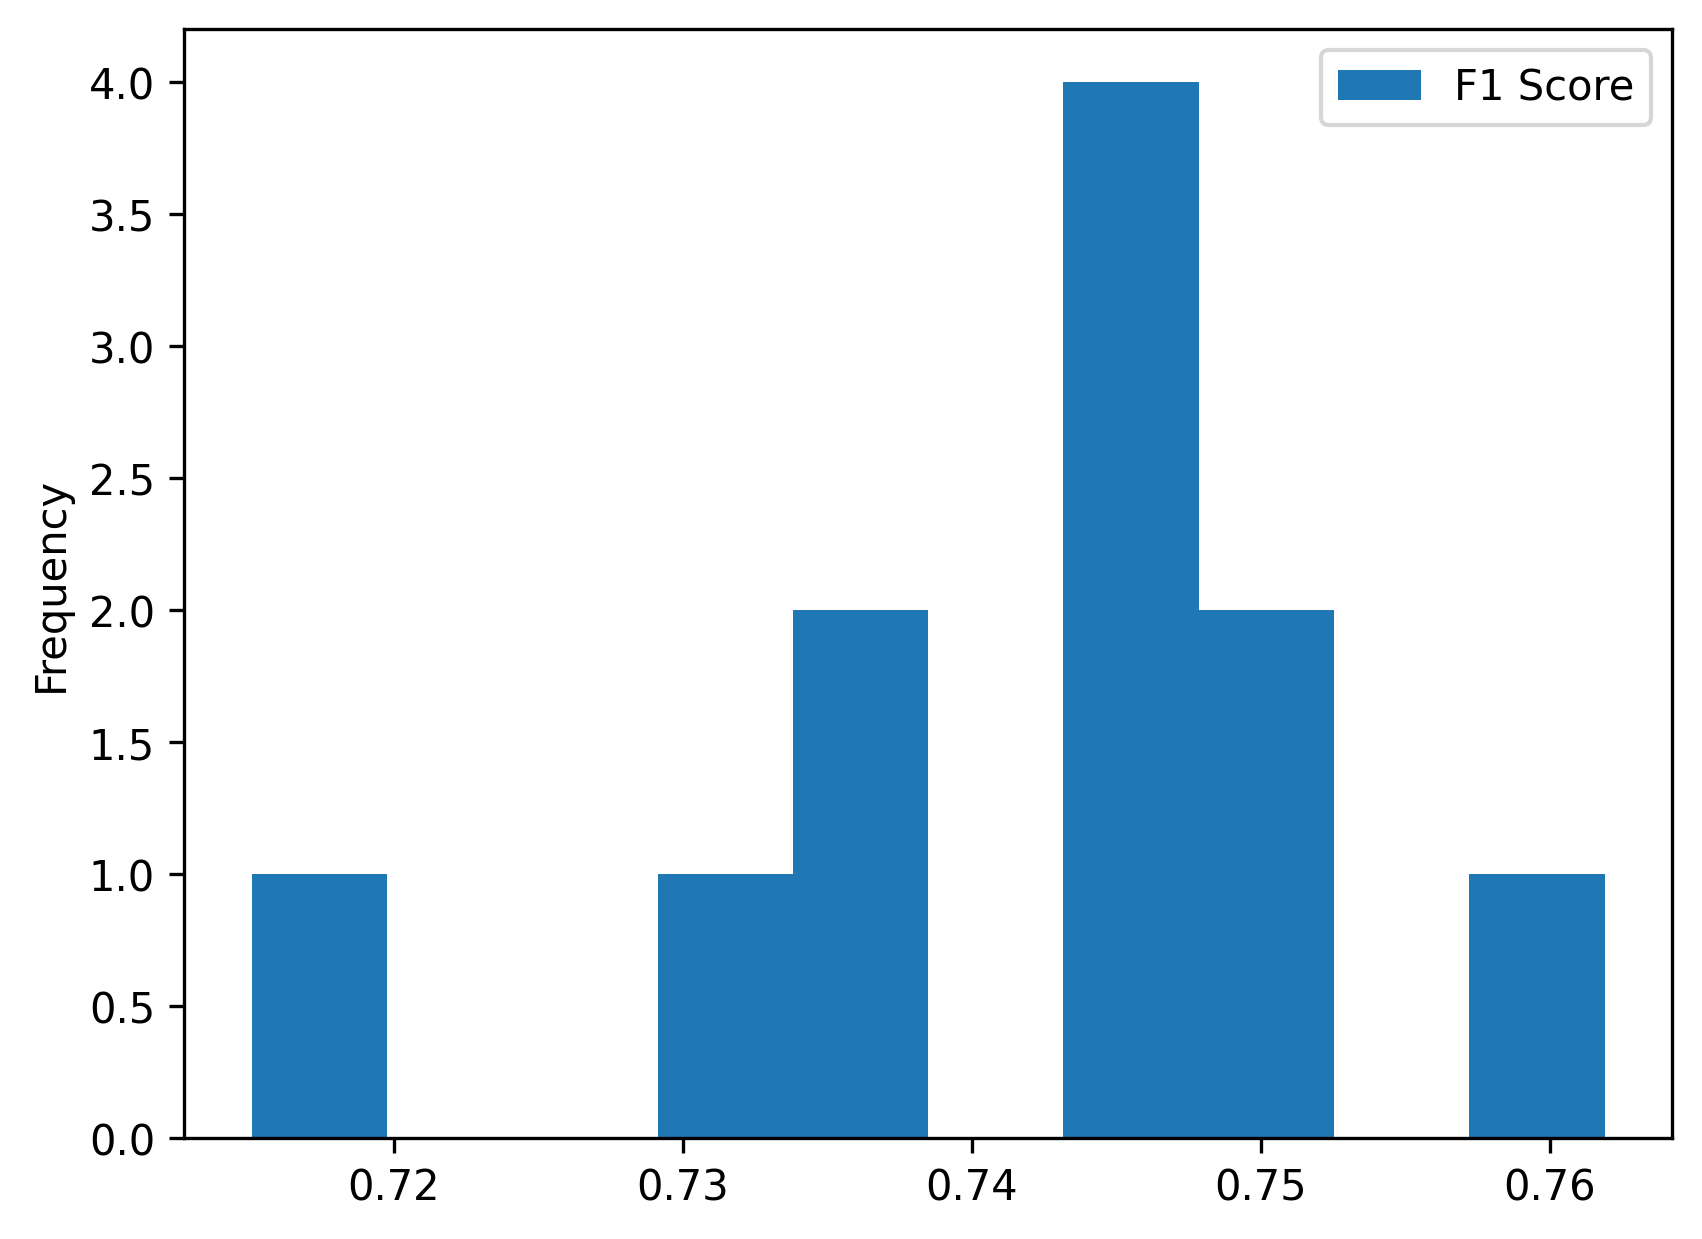

In [25]:
d = pd.DataFrame()
d["Window Size"] = [str(i) for i in range__]
d["F1 Score"] = f1_scores
d.plot(x="Window Size", y="F1 Score", kind="hist") 

<Axes: xlabel='Window Size'>

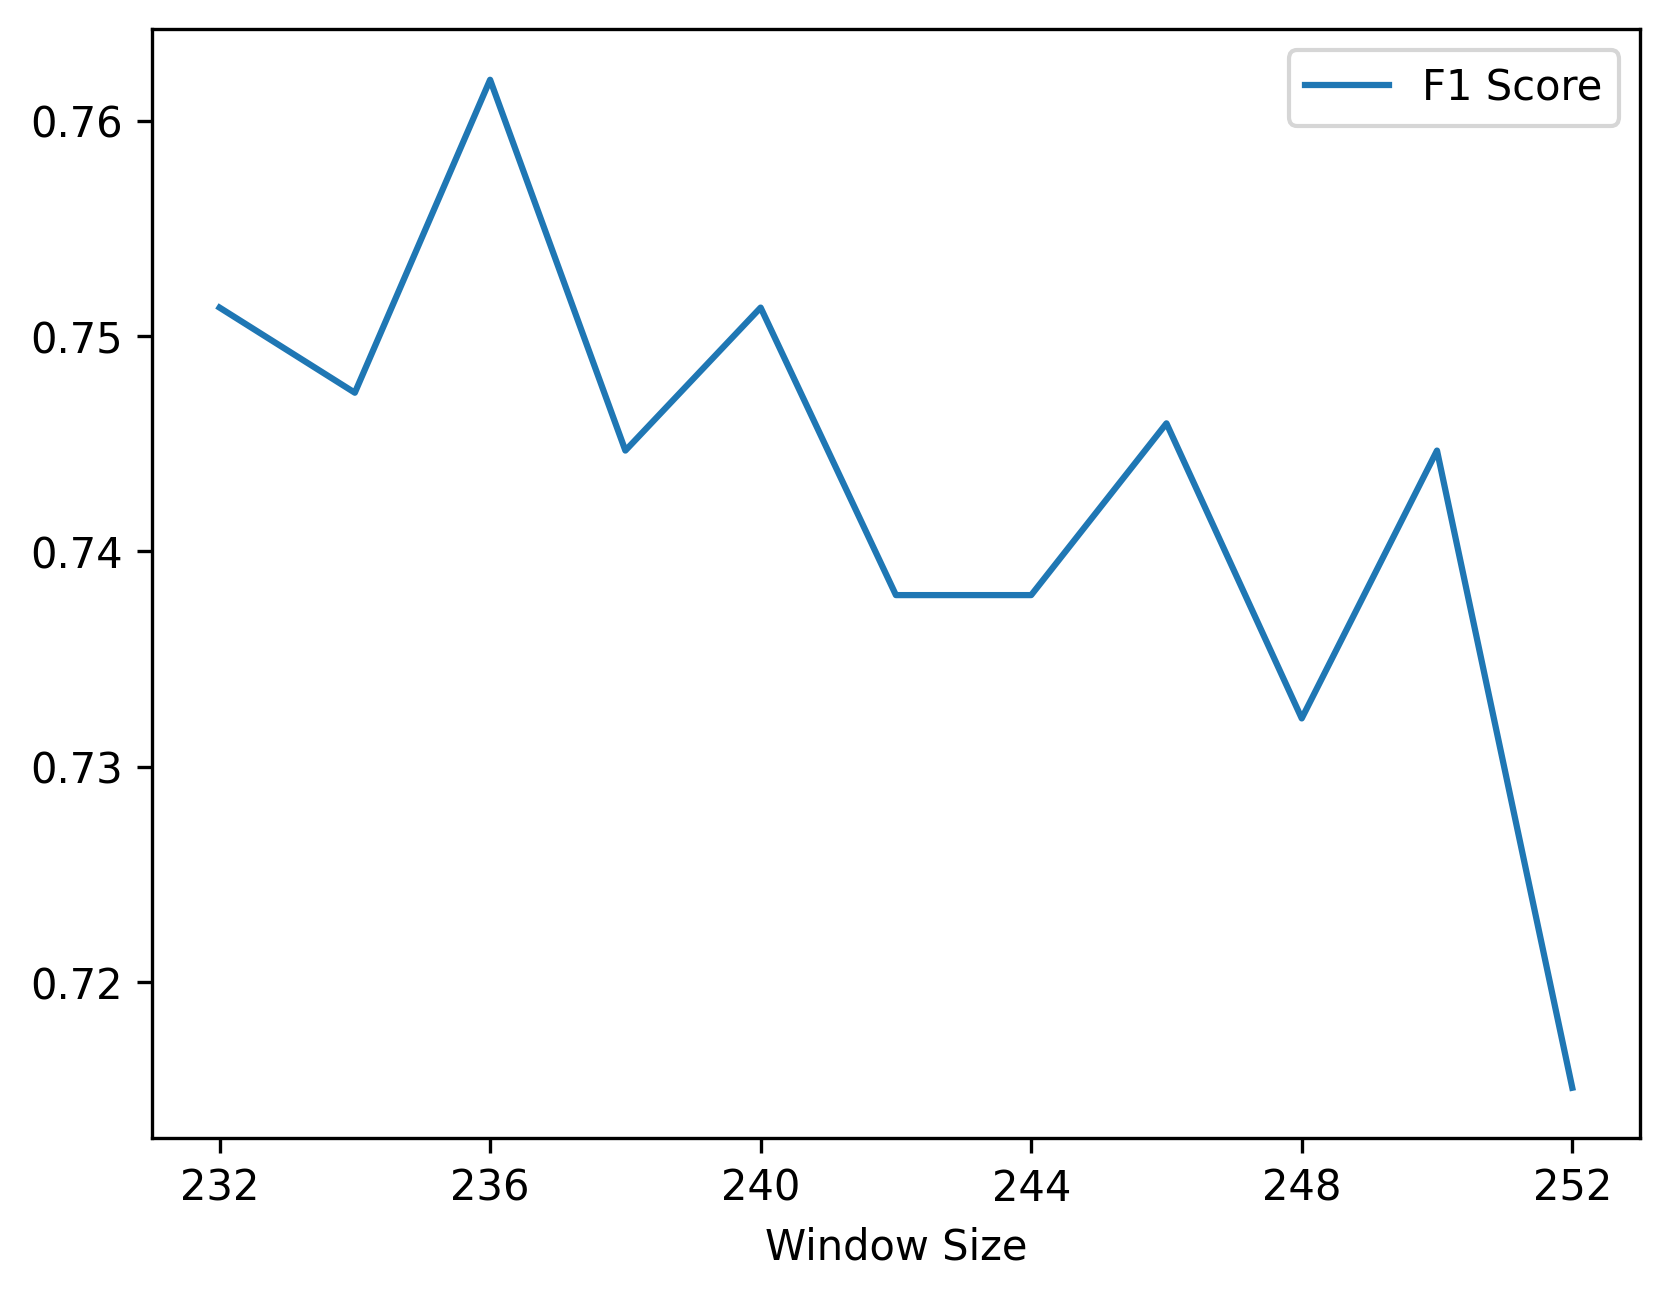

In [26]:
d.plot(x="Window Size", y="F1 Score", kind="line") 

## Check Naive Bayes prediction performance metrics.

In [27]:
# Count how many predictions there are.
print("/n pred_his: ", (len(preds2)))

# Initialize index for window sizes.
i = 0

# Initialize lists to store performance metrics.
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
f1_scores2 = []

# Evaluate performance metrics for each window size.
for his in pred_his2:
  labels = _y[start_testing_index:]
  preds = his[-(len(dataset)-start_testing_index):]
  print("\n--- Window Size: ", history_w2[i] )
  print( "Accuracy Score:", accuracy_score(labels, preds) )
  print( "Precision Score:", precision_score(labels, preds) )
  print( "Recall Score:", recall_score(labels, preds) )
  print( "F1 Score:", f1_score(labels, preds), "\n" )
  i += 1
  accuracy_scores2.append(accuracy_score(labels, preds))
  precision_scores2.append(precision_score(labels, preds))
  recall_scores2.append(recall_score(labels, preds))
  f1_scores2.append(f1_score(labels, preds))


/n pred_his:  162

--- Window Size:  232
Accuracy Score: 0.6666666666666666
Precision Score: 0.7228915662650602
Recall Score: 0.6593406593406593
F1 Score: 0.6896551724137931 


--- Window Size:  234
Accuracy Score: 0.6851851851851852
Precision Score: 0.7272727272727273
Recall Score: 0.7032967032967034
F1 Score: 0.7150837988826816 


--- Window Size:  236
Accuracy Score: 0.6790123456790124
Precision Score: 0.7191011235955056
Recall Score: 0.7032967032967034
F1 Score: 0.7111111111111111 


--- Window Size:  238
Accuracy Score: 0.6728395061728395
Precision Score: 0.7159090909090909
Recall Score: 0.6923076923076923
F1 Score: 0.7039106145251397 


--- Window Size:  240
Accuracy Score: 0.691358024691358
Precision Score: 0.7411764705882353
Recall Score: 0.6923076923076923
F1 Score: 0.7159090909090909 


--- Window Size:  242
Accuracy Score: 0.6728395061728395
Precision Score: 0.7375
Recall Score: 0.6483516483516484
F1 Score: 0.6900584795321637 


--- Window Size:  244
Accuracy Score: 0.672839

In [28]:
# Average F1 score across all window sizes.
sum(f1_scores2) / len(f1_scores2)

0.6974179412514211

### On validation set.

In [29]:
# On validation set using best Naive Bayes model.
X_val2 = best_scaler_nb.transform(X_val)
val_pred2 = best_clf_nb.predict(X_val2)

print("\n===== VALIDATION PERFORMANCE =====")
print("Validation Accuracy:", accuracy_score(_y_val, val_pred2))
print("Validation Precision:", precision_score(_y_val, val_pred2))
print("Validation Recall:", recall_score(_y_val, val_pred2))
print("Validation F1:", f1_score(_y_val, val_pred2))


===== VALIDATION PERFORMANCE =====
Validation Accuracy: 0.6382978723404256
Validation Precision: 0.52
Validation Recall: 0.7222222222222222
Validation F1: 0.6046511627906976


<Axes: ylabel='Frequency'>

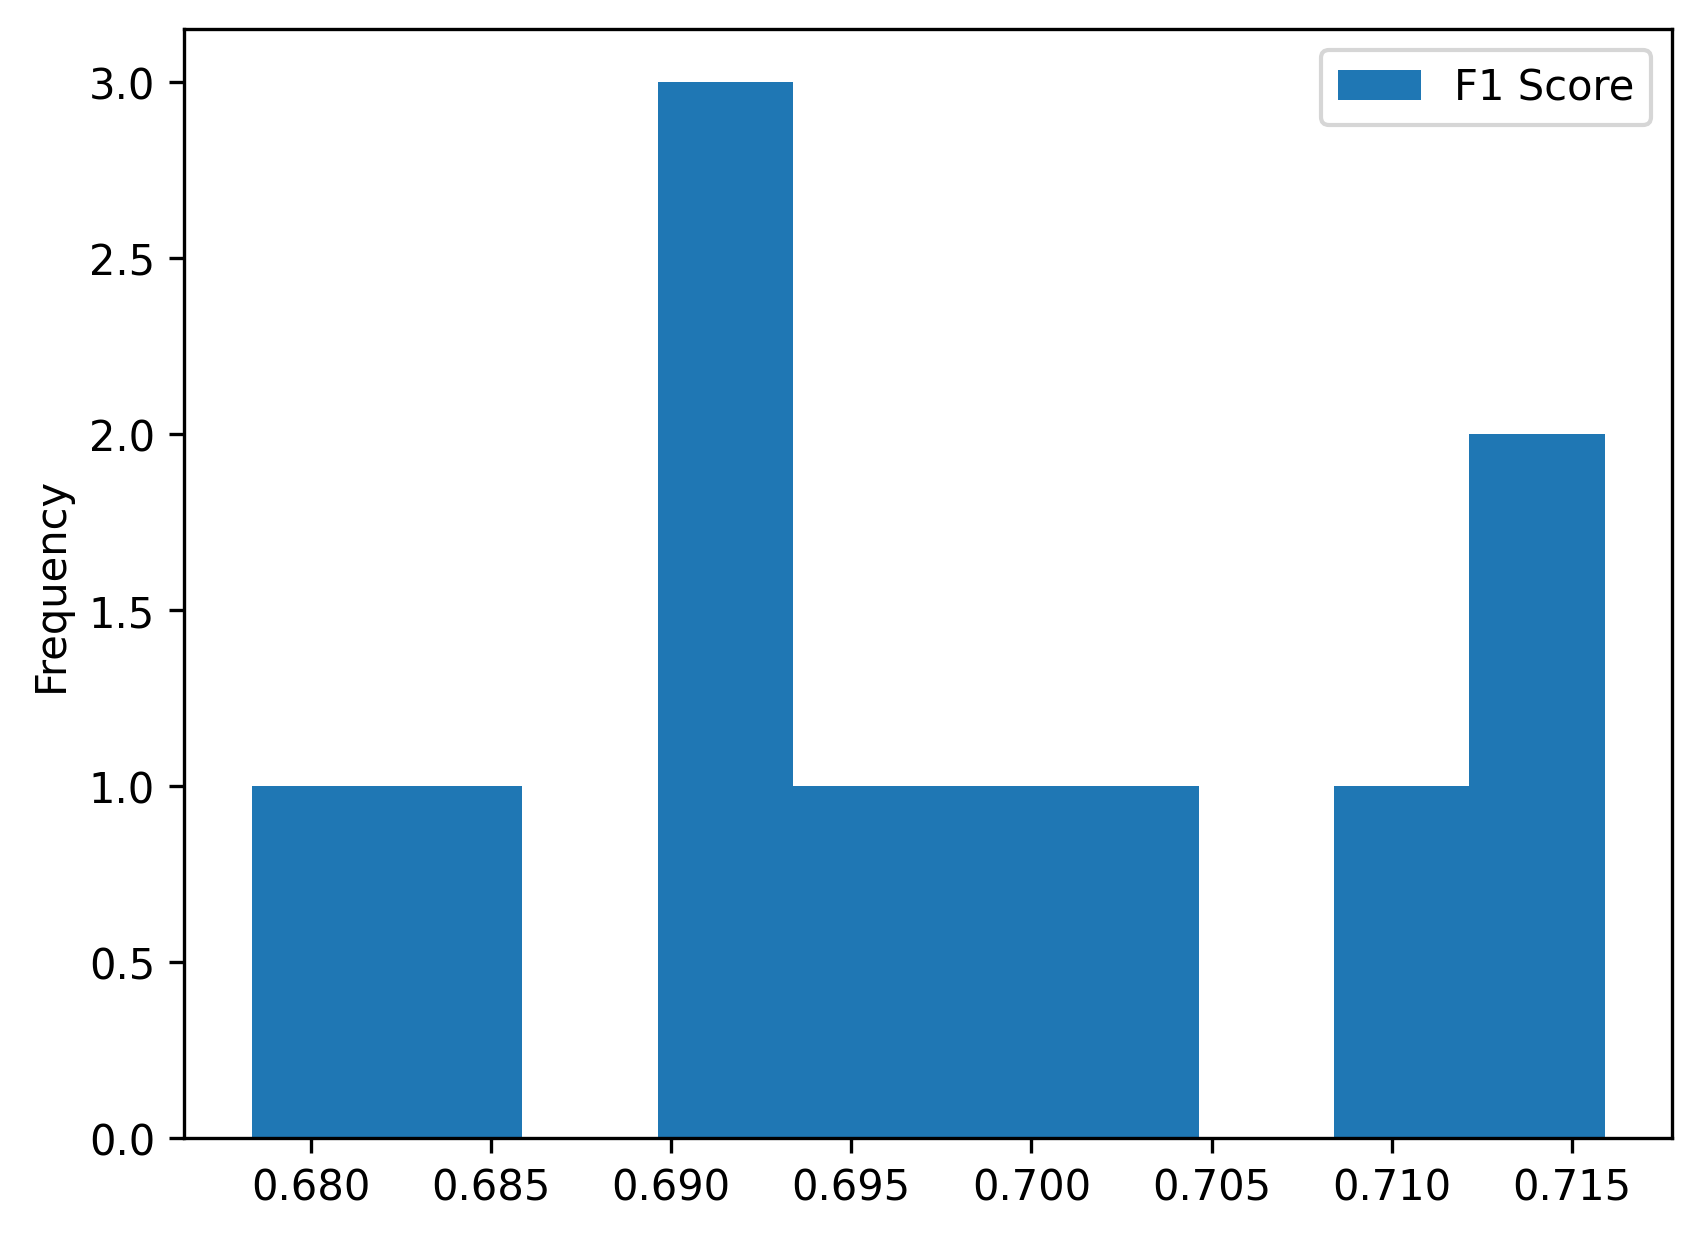

In [30]:
d2 = pd.DataFrame()
d2["Window Size"] = [str(i) for i in range__]
d2["F1 Score"] = f1_scores2
d2.plot(x="Window Size", y="F1 Score", kind="hist") 

<Axes: xlabel='Window Size'>

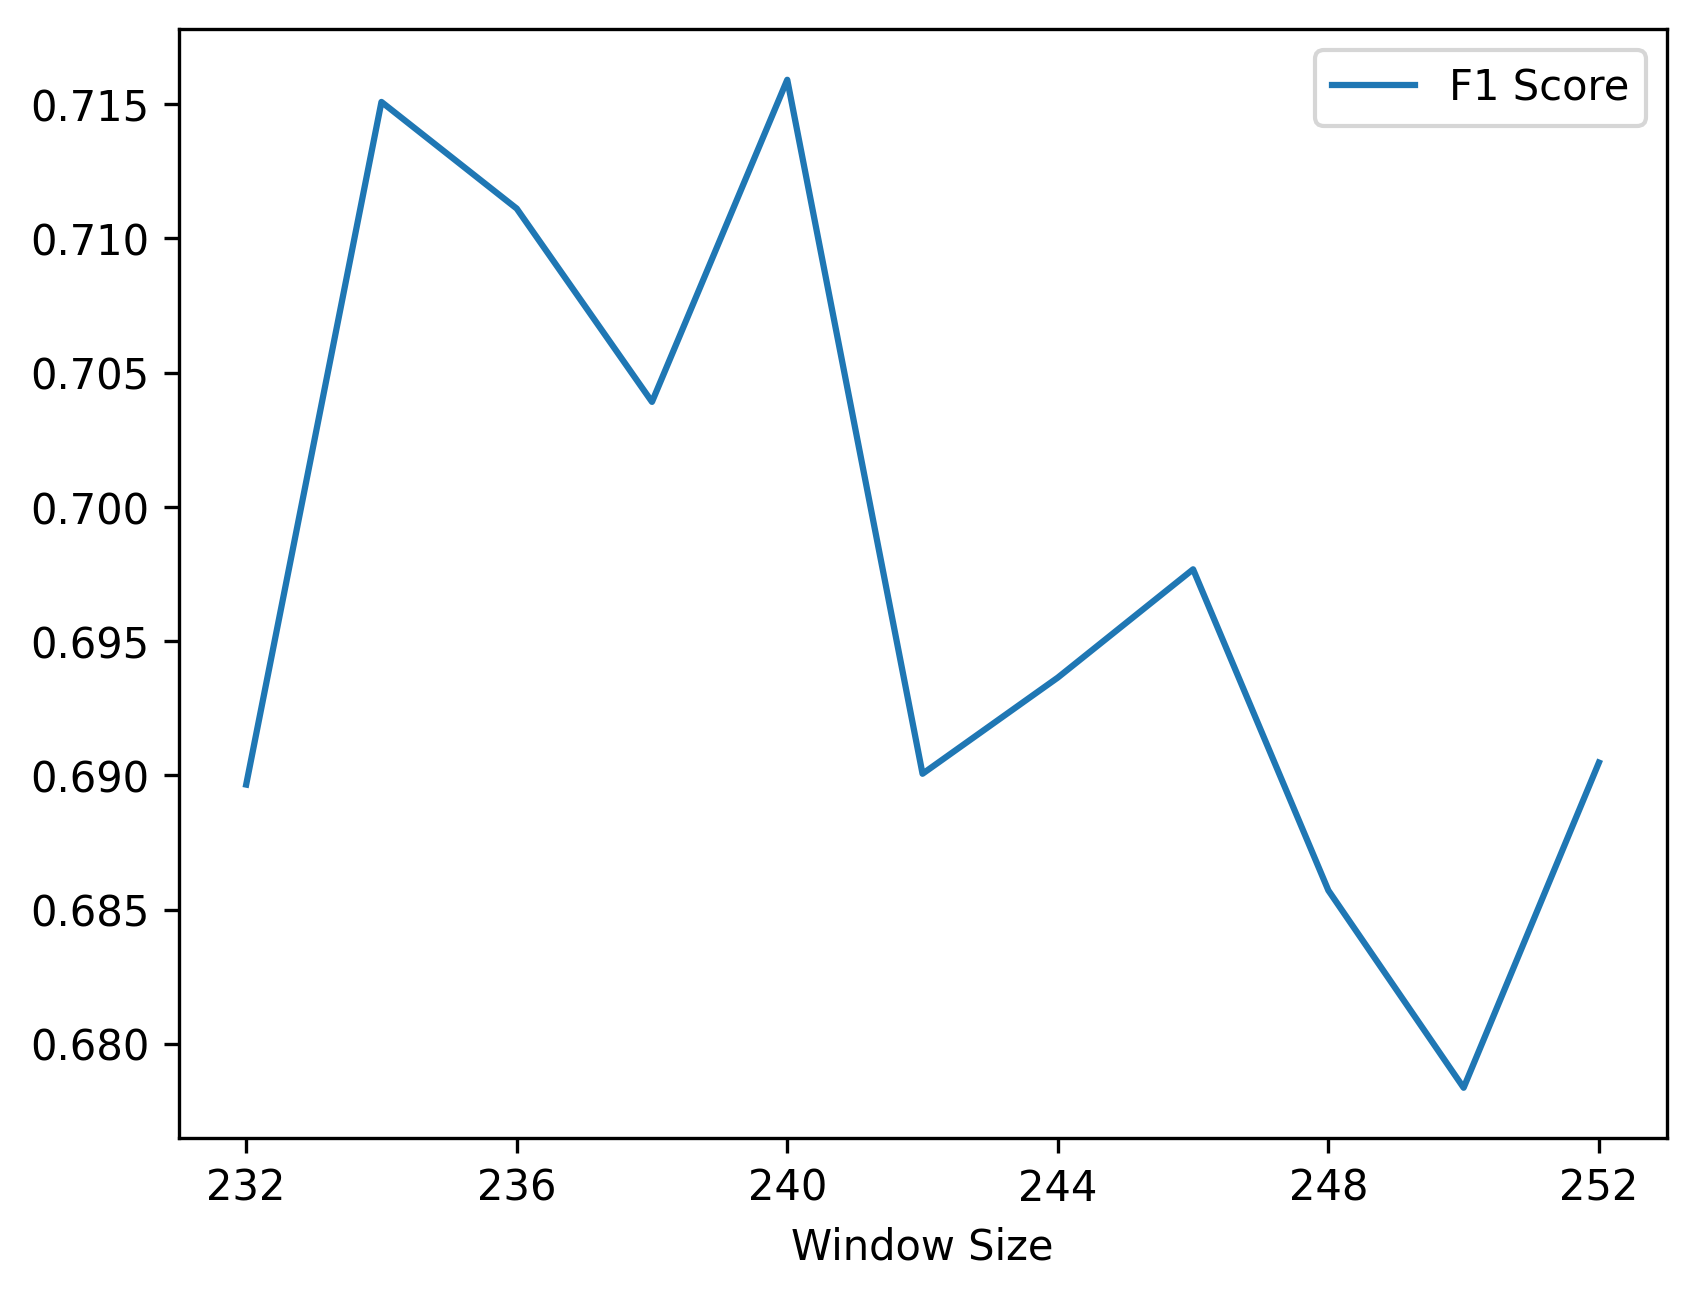

In [31]:
d2.plot(x="Window Size", y="F1 Score", kind="line") 

## Confusion Matrix

In [32]:
start = start_testing_index

_y = _y[start:]
preds_cm = preds[- ( len(X) - start ):]
print( confusion_matrix(_y, preds_cm) )
print( "Accuracy Score:", accuracy_score(_y, preds_cm) )
print( "Precision Score:", precision_score(_y, preds_cm) )
print( "Recall Score:", recall_score(_y, preds_cm) )
print( "F1 Score:", f1_score(_y, preds_cm) )

[[52 19]
 [33 58]]
Accuracy Score: 0.6790123456790124
Precision Score: 0.7532467532467533
Recall Score: 0.6373626373626373
F1 Score: 0.6904761904761905


In [33]:
start = start_testing_index

#_y = _y[start:]
preds2_cm = preds2[- ( len(X) - start ):]
print( confusion_matrix(_y, preds2_cm) )
print( "Accuracy Score:", accuracy_score(_y, preds2_cm) )
print( "Precision Score:", precision_score(_y, preds2_cm) )
print( "Recall Score:", recall_score(_y, preds2_cm) )
print( "F1 Score:", f1_score(_y, preds2_cm) )

[[52 19]
 [33 58]]
Accuracy Score: 0.6790123456790124
Precision Score: 0.7532467532467533
Recall Score: 0.6373626373626373
F1 Score: 0.6904761904761905
